In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [3]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

In [2]:
path = r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/02-Data'

raw_data_folder = r'01-Raw_Data'
prepared_data_folder = r'02-Prepared_Data'

In [4]:
ords_prods_custs = pd.read_pickle(os.path.join(path, prepared_data_folder, 'ords_prods_custs_4.9.pkl'))

In [ ]:
ords_prods_custs.head()

(32404859, 28)

For the sake of personal preferences, let's reorder the columns' order:

In [6]:
ords_prods_custs.columns.to_list()

['order_id',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_last_order',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_label',
 'busiest_days',
 'busiest_period_of_day',
 'order_max',
 'loyalty_flag',
 'spending_flag',
 'order_frequency_flag',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'joining_date',
 'num_of_dependants',
 'income']

In [7]:
new_columns_order = ['order_id', 'product_id', 'user_id', 'add_to_cart_order', 'reordered', 'order_number', 'product_name',
 'aisle_id', 'department_id', 'prices', 'price_label', 'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order',
 'busiest_days', 'busiest_period_of_day', 'order_max', 'loyalty_flag', 'spending_flag', 'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
 'age', 'joining_date', 'num_of_dependants', 'income']

ords_prods_custs = ords_prods_custs[new_columns_order]

ords_prods_custs.head(3)

,order_id,product_id,user_id,add_to_cart_order,reordered,order_number,product_name,aisle_id,department_id,prices,price_label,orders_day_of_week,order_hour_of_day,days_since_last_order,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income
0,2,33120,202279,1,1,3,Organic Egg Whites,86,16,11.3,Mid-Range,5,9,8.0,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119
1,26,33120,153404,5,0,2,Organic Egg Whites,86,16,11.3,Mid-Range,0,16,7.0,busiest_days,most_orders,32,regular_customer,low_spender,frequent_customer,Kathleen,Norton,Female,Virginia,62,8/15/2018,0,136045
2,120,33120,23750,13,0,11,Organic Egg Whites,86,16,11.3,Mid-Range,6,8,10.0,regular_days,average_orders,13,regular_customer,low_spender,frequent_customer,Clarence,Ball,Male,Michigan,66,10/30/2019,0,93806


### 2) Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

#### Bar Chart  
Let's create a bar chart to see the distribution of the order day of the week

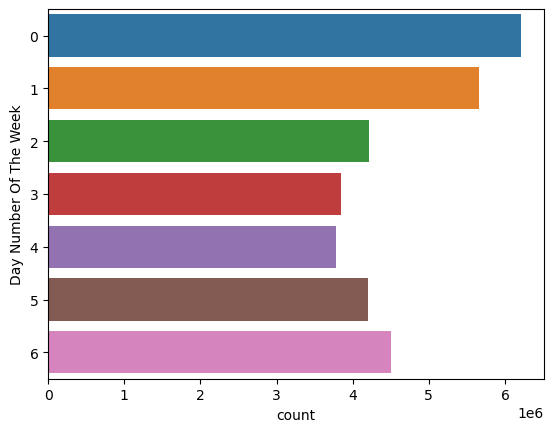

In [141]:
dow_bar = sns.countplot(y='orders_day_of_week', data = ords_prods_custs).set_ylabel('Day Number Of The Week')
dow_bar.figure.savefig(r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/04-Analysis/Visualizations/dow_bar.png')

#### Histogram  

Let's create a histogram to see the distribution of products prices:

<Axes: ylabel='Frequency'>

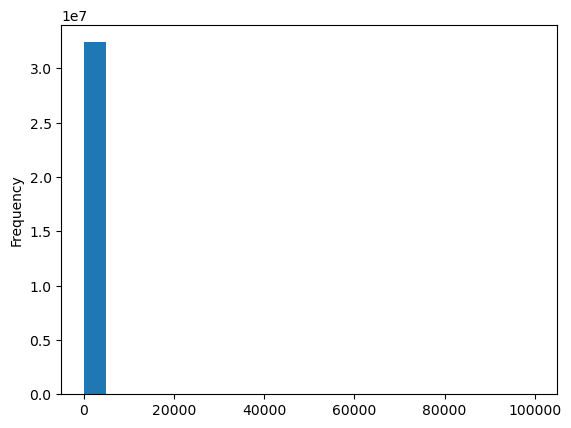

In [10]:
ords_prods_custs['prices'].plot.hist(bins=20)

In [11]:
ords_prods_custs['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

The max values is a bit illogical and it must an error.  
By plotting the scatterplot below we can see that there are two values that are completely illogical.  
While it seems that there are only three data points in the scatterplot, that is not the case, it is just the to show the outliers,  
the plot is not able to show all the single points whose majority value is probably in the range 0-25 or something near that. 

<Axes: xlabel='prices', ylabel='prices'>

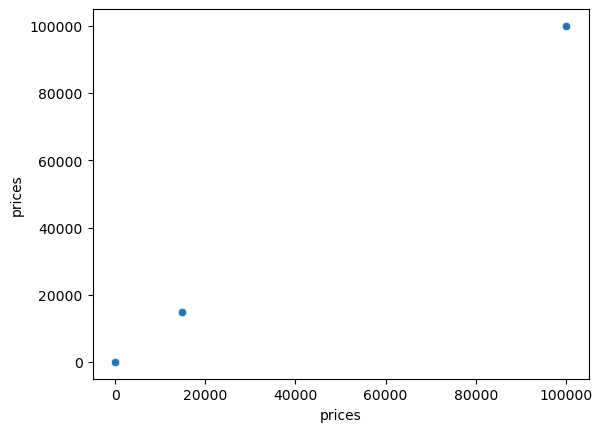

In [12]:
sns.scatterplot(x='prices', y='prices', data=ords_prods_custs)

In [20]:
# chose arbitrarily a value of 1000 as it seems all the outliers are above that
ords_prods_custs[ords_prods_custs['prices']>1000]['prices'].value_counts()

prices
14900.0    4429
99999.0     698
Name: count, dtype: int64

Let's fix these erroneous values by filling them with NaN for now, let's replot the histogram:

In [25]:
ords_prods_custs.loc[ords_prods_custs['prices']>1000, 'prices'] = np.nan

In [34]:
# we filled 5127 values with NaN
ords_prods_custs[ords_prods_custs['prices'].isnull()]['prices'].value_counts(dropna=False)

prices
NaN    5127
Name: count, dtype: int64

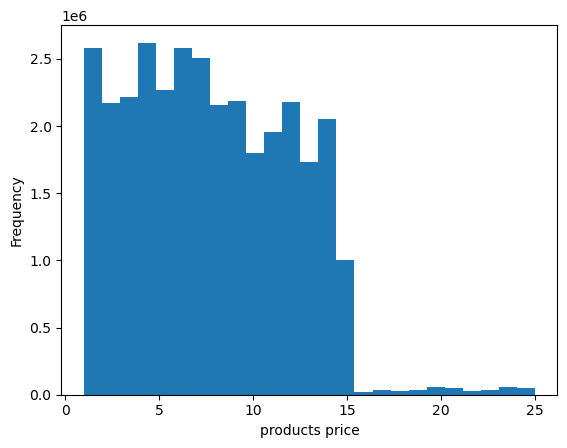

In [143]:
prices_hist = ords_prods_custs['prices'].plot.hist(bins=25).set_xlabel('products price')
prices_hist.figure.savefig(r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/04-Analysis/Visualizations/prices_hist.png')

#### Line Chart  
Let's plot a line chart to show the change in the product's price that are sold across the different ways of the week.  
Give the large dataset, to avoid running out of memory we will create a subset of `ords_prods_custs`.  
However, the subset must be representative and not just a slice of the type `ords_prods_custs[:1_000_000]`.  
To make a sample that is truly representative of the population we will use random numbers.  
Let's create a subset that is split 30/70, that is 30% of the data will go in one subset and the other 70% in a second subset.

In [48]:
# matrix 5 x 3 of numbers [0,1)
np.random.rand(5,3)

array([[0.92735729, 0.69410232, 0.73824187],
       [0.34064579, 0.02156656, 0.43852881],
       [0.40823223, 0.90723449, 0.11207487],
       [0.07987725, 0.39887388, 0.07850024],
       [0.20555482, 0.49631298, 0.8099877 ]])

In [60]:
# the rand() function return a number between [0,1). Each argument represent a dimension.
# this makes one ndarray of one-dimension with as many numbers [0,1) as the len(ords_prods_custs)

probs = np.random.rand(len(ords_prods_custs))
probs

array([0.85958302, 0.61215498, 0.84694499, ..., 0.46557704, 0.5203049 ,
       0.1159111 ])

Create a Bool Mask to filter split the dataset 70/30

In [62]:
probs = probs <= 0.7
probs

array([False,  True, False, ...,  True,  True,  True])

In [63]:
subset_70 = ords_prods_custs[probs]
subset_30 = ords_prods_custs[~probs]

In [74]:
print('rows subset_70:', subset_70.shape[0])
print('rows subset_30:', subset_30.shape[0])

rows subset_70: 22684961
rows subset_30: 9719898


To speed up the process and using less memory let's take only the needed columns to draw the line chart:

In [76]:
df = subset_30[['prices','orders_day_of_week']]
df.head()

,prices,orders_day_of_week
0,11.3,5
2,11.3,6
7,11.3,3
8,11.3,3
15,11.3,4


/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


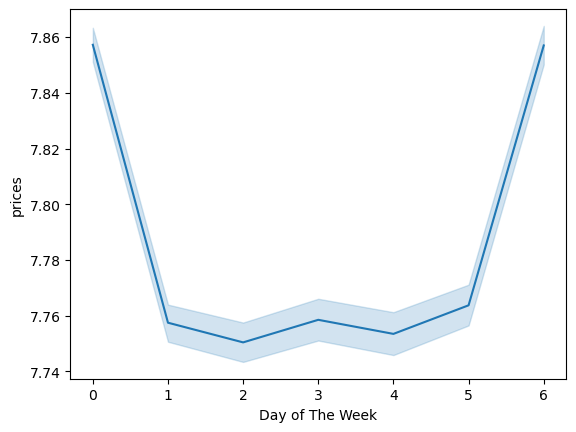

In [145]:
line_chart = sns.lineplot(x='orders_day_of_week', y='prices', data=df).set_xlabel('Day of The Week')
line_chart.figure.savefig(r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/04-Analysis/Visualizations/dow_prices_line.png')

### 3) You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the `order_hour_of_day` column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [89]:
ords_prods_custs.head(3)

,order_id,product_id,user_id,add_to_cart_order,reordered,order_number,product_name,aisle_id,department_id,prices,price_label,orders_day_of_week,order_hour_of_day,days_since_last_order,busiest_days,busiest_period_of_day,order_max,loyalty_flag,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income
0,2,33120,202279,1,1,3,Organic Egg Whites,86,16,11.3,Mid-Range,5,9,8.0,regular_days,average_orders,8,new_customer,low_spender,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119
1,26,33120,153404,5,0,2,Organic Egg Whites,86,16,11.3,Mid-Range,0,16,7.0,busiest_days,most_orders,32,regular_customer,low_spender,frequent_customer,Kathleen,Norton,Female,Virginia,62,8/15/2018,0,136045
2,120,33120,23750,13,0,11,Organic Egg Whites,86,16,11.3,Mid-Range,6,8,10.0,regular_days,average_orders,13,regular_customer,low_spender,frequent_customer,Clarence,Ball,Male,Michigan,66,10/30/2019,0,93806


/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


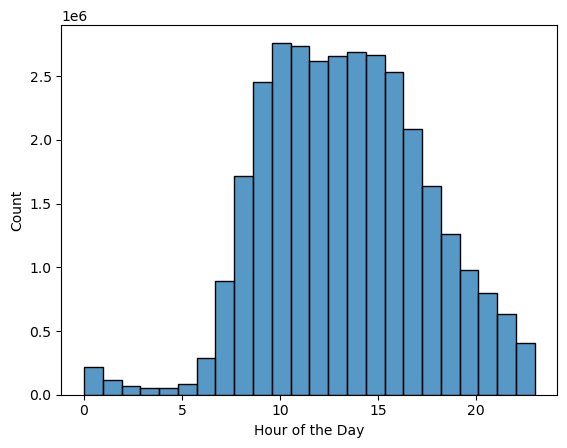

In [146]:
hod_hist = sns.histplot(data=ords_prods_custs, x = 'order_hour_of_day', bins=24).set_xlabel('Hour of the Day')
hod_hist.figure.savefig(r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/04-Analysis/Visualizations/hod_hist.png')

We can see that the majority of orders are placed between around 10:00am and 4:00pm  

### 4) The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.


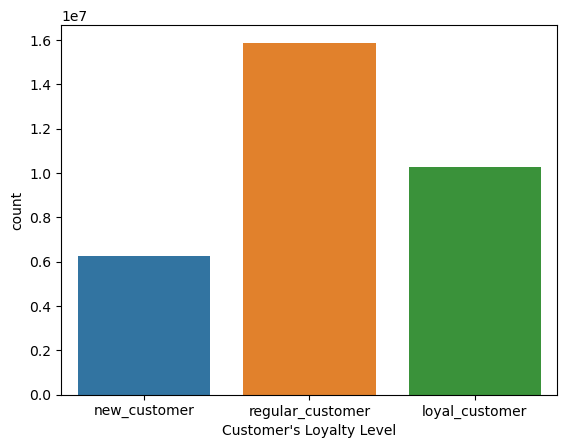

In [147]:
loyalty_bar = sns.countplot(data=ords_prods_custs, x='loyalty_flag').set_xlabel('Customer\'s Loyalty Level')
loyalty_bar.figure.savefig(r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/04-Analysis/Visualizations/loyalty_bar.png')

#### 5) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [119]:
# due to memory limitation, let's make a smaller sample of about 30% of the population
mask_30 = np.random.rand(len(ords_prods_custs))
mask_30

array([0.27492071, 0.33272391, 0.17183034, ..., 0.49211114, 0.98492591,
       0.28809748])

In [129]:
sample_30 = ords_prods_custs[mask_30 <= 0.3]


In [130]:
# let's consider only the `prices` and `order_hour_of_day` columns
sample_30_ = sample_30[['prices', 'order_hour_of_day']]

/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


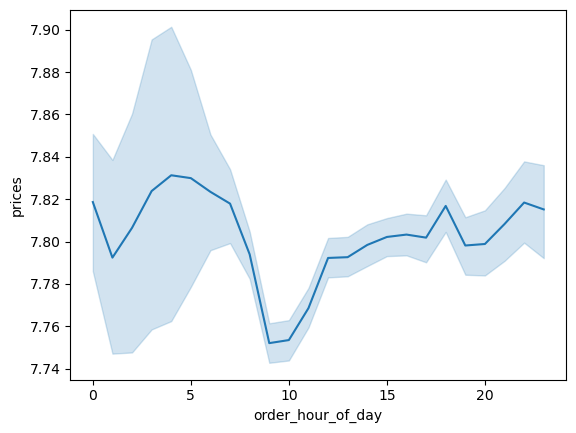

In [148]:
hod_prices_line = sns.lineplot(data=sample_30_, x='order_hour_of_day', y='prices')
hod_prices_line.figure.savefig(r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/04-Analysis/Visualizations/hod_prices_line.png')

In [124]:
ords_prods_custs['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: count, dtype: int64

### 6) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
 - In a markdown cell beneath your line chart, describe what the line chart shows.

/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


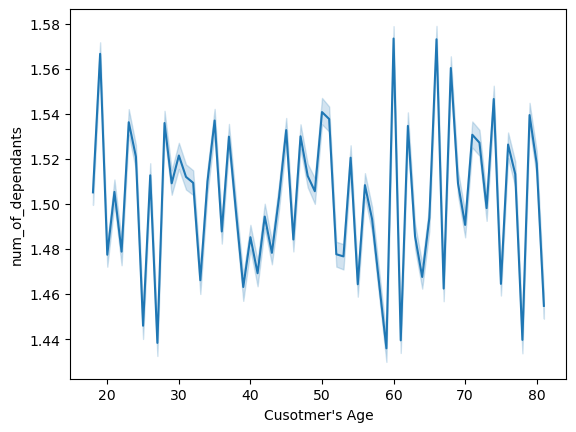

In [149]:
# for the line chart will use the subset sample_30
age_dep_line = sns.lineplot(x='age', y='num_of_dependants', data = sample_30).set_xlabel('Cusotmer\'s Age')
age_dep_line.figure.savefig(r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/04-Analysis/Visualizations/age_dep_line.png')

There seems to be no clear relationship between the age and the number of dependants

### 7) You’ll also need to explore whether there’s a connection between age and spending power (income).

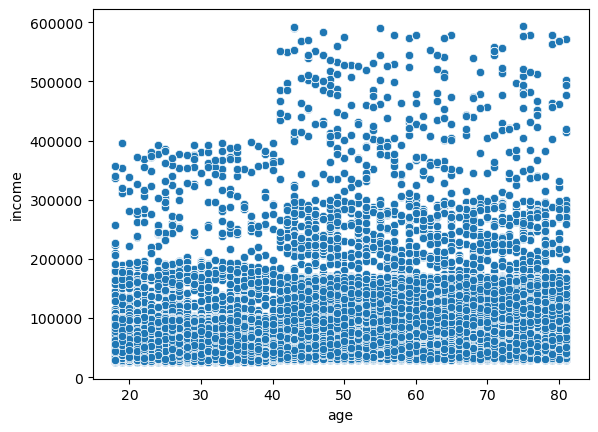

In [150]:
income_age_scatter = sns.scatterplot(x='age', y='income', data=ords_prods_custs)
income_age_scatter.figure.savefig(r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/04-Analysis/Visualizations/income_age_scatter.png')

There seem to be no correlation between the two varibles. It is evident that almost at all ages there are customers whose income is either in the lower end or in the upper end. It is clear from the scatterplot that the majority of customer's have a salary below 200k. 